In [16]:
#import libraries and raw output_file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

headers= ['time', 'P']
df = pd.read_csv('tier_1.csv', names=headers)
df.drop(df.index[0], inplace=True)
print(df)

            time       P
1            0.0   0.001
2            1.0  10.000
3            2.0  10.000
4            3.0  10.000
5            4.0  10.000
...          ...     ...
525596  525595.0   0.001
525597  525596.0   0.001
525598  525597.0   0.001
525599  525598.0   0.001
525600  525599.0   0.001

[525600 rows x 2 columns]


In [17]:
#adding a time column

df['time'] = pd.date_range('2023-01-01 00:00:00', '2023-12-31 23:59:00', freq='1T')  # '1T' stands for 1 minutes
df_timestamp = df[['time','P']]


print(df_timestamp)

                      time       P
1      2023-01-01 00:00:00   0.001
2      2023-01-01 00:01:00  10.000
3      2023-01-01 00:02:00  10.000
4      2023-01-01 00:03:00  10.000
5      2023-01-01 00:04:00  10.000
...                    ...     ...
525596 2023-12-31 23:55:00   0.001
525597 2023-12-31 23:56:00   0.001
525598 2023-12-31 23:57:00   0.001
525599 2023-12-31 23:58:00   0.001
525600 2023-12-31 23:59:00   0.001

[525600 rows x 2 columns]


In [18]:
df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time
new_df = df[['date','time','P']]

print(new_df)

              date      time       P
1       2023-01-01  00:00:00   0.001
2       2023-01-01  00:01:00  10.000
3       2023-01-01  00:02:00  10.000
4       2023-01-01  00:03:00  10.000
5       2023-01-01  00:04:00  10.000
...            ...       ...     ...
525596  2023-12-31  23:55:00   0.001
525597  2023-12-31  23:56:00   0.001
525598  2023-12-31  23:57:00   0.001
525599  2023-12-31  23:58:00   0.001
525600  2023-12-31  23:59:00   0.001

[525600 rows x 3 columns]


In [19]:
#Calculating the average

average_1 = new_df.groupby(['date', 'time'])['P'].mean().reset_index()
average_1_pivot = average_1.pivot(index='date', columns='time', values='P')
average_daily_1 = average_1_pivot.mean(axis=0)
average_daily_1 = average_daily_1.to_frame()
average_daily_1.reset_index(inplace=True)
average_daily_1.rename(columns={0: 'P'}, inplace=True)
#average_daily_1 = average_daily_1[['time','P']]
#output_csv_path = 'avg_profile.csv'
#avg_profile.to_csv(output_csv_path, index=True)
print(average_daily_1)

          time         P
0     00:00:00  0.205997
1     00:01:00  0.384096
2     00:02:00  0.548504
3     00:03:00  0.658137
4     00:04:00  0.754038
...        ...       ...
1435  23:55:00  0.946030
1436  23:56:00  0.754266
1437  23:57:00  0.576208
1438  23:58:00  0.357063
1439  23:59:00  0.110515

[1440 rows x 2 columns]


In [20]:
#Calculating the agregated demand, depending on how many profiles we have can be yearly, monthly, seasonal, daily.
total_demand_Kwh = (((df['P'].sum())/60)/1000)
name= 'Total demand (kWh)' 
#can be yearly, monthly, daily
print(f"{name}: {total_demand_Kwh}")

Total demand (kWh): 15.598763999999997


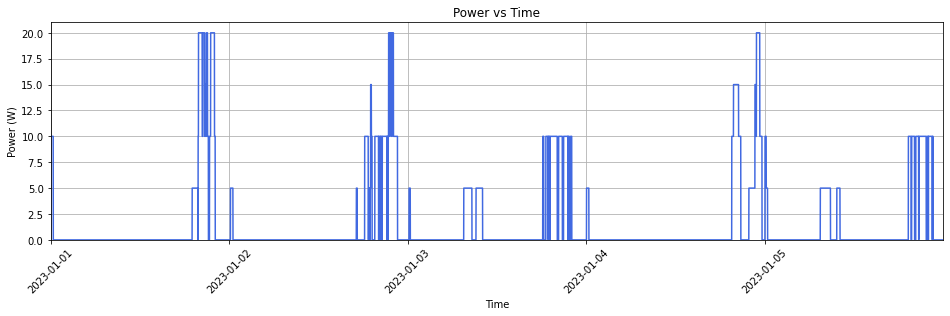

In [21]:
#Plots
#Plotting profiles in series for selected days

# Filter the DataFrame to include only the desired days
# For example, let's say we want to plot data for January 1st to January 10th
start_date = pd.Timestamp('2023-01-01 00:00:00')
end_date = pd.Timestamp('2023-01-05 23:59:00')

filtered_df = df_timestamp[(df_timestamp['time'] >= start_date) & (df_timestamp['time'] <= end_date)]

plt.figure(figsize=(16, 4))
plt.plot(filtered_df['time'], filtered_df['P'], "#4169e1")
plt.xlabel('Time')
plt.ylabel("Power (W)")
plt.ylim(ymin=0)
plt.margins(x=0)
plt.margins(y=0)

# Format x-axis ticks to show specific days
days = pd.date_range(start=start_date, end=end_date, freq='D')
plt.xticks(days, [day.strftime('%Y-%m-%d') for day in days], rotation=45)

plt.title('Power vs Time')
plt.grid(True)
plt.show()

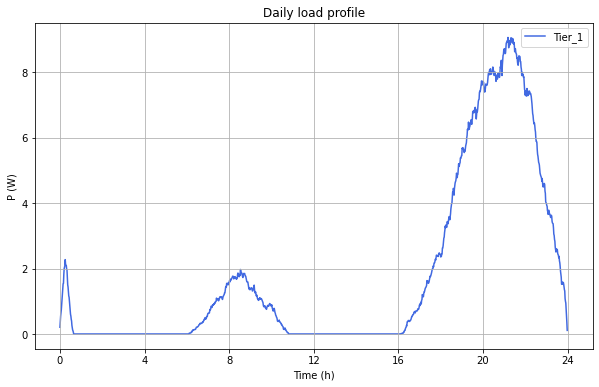

In [22]:
#Plot average daily load 
#df1['time'] = pd.to_datetime(df1['time'])
average_daily_1['time_numeric'] = average_daily_1['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(average_daily_1['time_numeric'], average_daily_1['P'], label='Tier_1', color="#4169e1", zorder=1)

# Set custom ticks on the x-axis
plt.xticks([0, 14400,28800 , 43200, (960*60), (1200*60), (1440*60)],['0', '4', '8', '12', '16', '20', '24'])

# Add title, labels, legend, and grid
plt.title('Daily load profile')
plt.xlabel('Time (h)')
plt.ylabel('P (W)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [4]:
#Plot an agreggated load curve and individual contribution of each appliance or dimension (stacked plot)
# Calculate the aggregated load curve by summing the power consumption of all appliances

df_multi = pd.read_csv('tiers.csv')
df_multi.drop(columns=['time'], inplace=True)
print(df_multi)

             1         2          3          4
0     0.205997  0.385074  16.311995  18.429890
1     0.384096  1.324855  32.311975  29.684693
2     0.548504  1.722167  43.662674  41.832614
3     0.658137  2.346879  56.588753  53.818896
4     0.754038  3.429123  69.788759  63.279148
...        ...       ...        ...        ...
1435  0.946030  5.862104  31.427079  30.005115
1436  0.754266  4.634745  27.164129  28.476416
1437  0.576208  3.390964  26.619019  25.947745
1438  0.357063  1.944444  13.457545  16.649285
1439  0.110515  0.371918   0.687888   0.594710

[1440 rows x 4 columns]


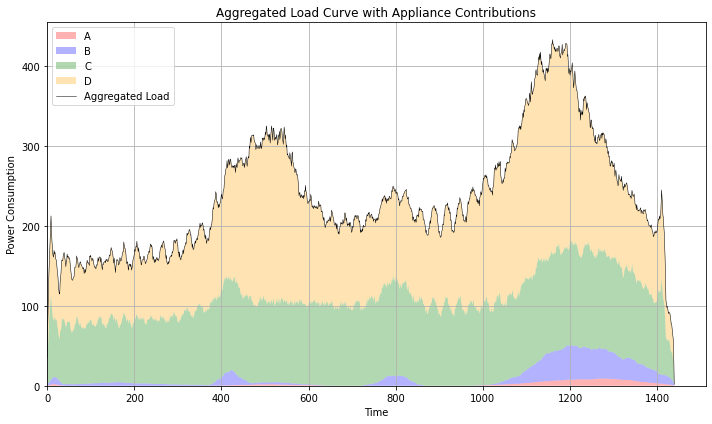

In [14]:
# Calculate the aggregated load curve
aggregated_load = df_multi.sum(axis=1)


# Plot the stacked area plot for each appliance inside the aggregated load curve
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange']


# Plot each appliance's contribution as a stacked area with different colors
plt.stackplot(df_multi.index,df_multi['1'], df_multi['2'], df_multi['3'],df_multi['4'], labels=['A','B','C','D'], colors=colors, alpha=.3)

# Plot the aggregated load curve
plt.plot(aggregated_load, color='black', linewidth=.5, label='Aggregated Load')

# Customize plot
plt.title('Aggregated Load Curve with Appliance Contributions')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
# Show plot
plt.tight_layout()
plt.show()

